In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Подгружаем данные и рассуждаем, что может являеться курсом (лист рассуждений объемный)

In [2]:
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-prach-38/assessments.csv')
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [3]:
# (Проверка на дубликаты)
duplicateRows = assessments.loc[assessments.duplicated()]
duplicateRows

,code_module,code_presentation,id_assessment,assessment_type,date,weight


#### Таблица №1 (экзамены)

In [4]:
# в наличии 24 графы с экзаменами, из которых в 13 экзаменах не заполнена дата. 
ex = assessments.query('assessment_type == "Exam"')
ex

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [5]:
# содержит список предметов по семестрам
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-prach-38/courses.csv')
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [6]:
duplicateRows2 = courses.loc[courses.duplicated()]
duplicateRows2

,code_module,code_presentation,module_presentation_length


In [7]:
# 22 комбинации предмет-семестр
courses.count()

code_module                   22
code_presentation             22
module_presentation_length    22
dtype: int64

In [8]:
courses.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

#### Таблица 2 (Смотрим, как предметы ведут себя по 4 семестрам)

In [9]:
courses.query('code_presentation == "2013B"')

,code_module,code_presentation,module_presentation_length
4,BBB,2013B,240
10,DDD,2013B,240
17,FFF,2013B,240


In [10]:
courses.query('code_presentation == "2013J"')

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
2,BBB,2013J,268
8,DDD,2013J,261
12,EEE,2013J,268
15,FFF,2013J,268
19,GGG,2013J,261


In [11]:
courses.query('code_presentation == "2014B"')

,code_module,code_presentation,module_presentation_length
5,BBB,2014B,234
7,CCC,2014B,241
11,DDD,2014B,241
14,EEE,2014B,241
18,FFF,2014B,241
21,GGG,2014B,241


In [12]:
courses.query('code_presentation == "2014J"')

,code_module,code_presentation,module_presentation_length
1,AAA,2014J,269
3,BBB,2014J,262
6,CCC,2014J,269
9,DDD,2014J,262
13,EEE,2014J,269
16,FFF,2014J,269
20,GGG,2014J,269


In [13]:
# содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
studentAssessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-prach-38/studentAssessment.csv')
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [14]:
# проверка на дубликаты
duplicateRows3 = courses.loc[studentAssessment.duplicated()]
duplicateRows3

,code_module,code_presentation,module_presentation_length


In [68]:
# проверка на то, были ли перезачтены экзамены, где в дате пустое поле. Не были. Значит, просто пустое поле с датой.
saq = studentAssessment.query('id_assessment in ("1757", "1763", "14990", "15002", "15014", \
"15025", "24290", "40087", "24299", "40088", "25368")').groupby('id_assessment').agg({'id_student':'count', 'is_banked':'sum'})
saq

,id_student,is_banked
id_assessment,,
24290,747,0
24299,1168,0
25368,950,0


In [16]:
# содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
studentRegistration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-prach-38/studentRegistration.csv')
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [17]:
duplicateRows4 = courses.loc[studentRegistration.duplicated()]
duplicateRows4

,code_module,code_presentation,module_presentation_length


In [18]:
double =  pd.merge(courses[['code_module', 'code_presentation']], assessments[['code_module', 'code_presentation', 'id_assessment']],\
                   on=['code_module', 'code_presentation'], how='left')
double

,code_module,code_presentation,id_assessment
0,AAA,2013J,1752
1,AAA,2013J,1753
2,AAA,2013J,1754
3,AAA,2013J,1755
4,AAA,2013J,1756
...,...,...,...
201,GGG,2014B,37433
202,GGG,2014B,37425
203,GGG,2014B,37426
204,GGG,2014B,37427


In [19]:
studentAssessment_new = pd.merge(studentAssessment, double,\
                   on=['id_assessment'], how='left')
studentAssessment_new 

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation
0,1752,11391,18,0,78.0,AAA,2013J
1,1752,28400,22,0,70.0,AAA,2013J
2,1752,31604,17,0,72.0,AAA,2013J
3,1752,32885,26,0,69.0,AAA,2013J
4,1752,38053,19,0,79.0,AAA,2013J
...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J
173908,37443,534672,229,0,100.0,GGG,2014J
173909,37443,546286,215,0,80.0,GGG,2014J
173910,37443,546724,230,0,100.0,GGG,2014J


In [20]:
# проверка, за какие экзамены стоят оценки.
studentAssessment_new.query('id_assessment in ("1757", "1763", "14990", "15002", "15014", "15025", "24290", "40087",\
"24299", "40088", "25340", "25354", "25361", "25368", "30713", "30718", "30723", "34872", "34885", "34898", "34911",\
"37424", "37434", "37444")').groupby(['code_module', 'code_presentation']).agg({'id_student':'count'})

id_student
code_module code_presentation            
CCC         2014B                     747
            2014J                    1168
DDD         2013B                     602
            2013J                     968
            2014B                     524
            2014J                     950

In [21]:
# мерж таблиц, чтобы посмотреть более развернуто (предыдущие мержи нужны были, чтобы минимизировать декартово произведение)
student_registration_assessment = pd.merge(studentAssessment_new, studentRegistration, on=['id_student', 'code_module', 'code_presentation'], how='left')
student_registration_assessment
# .groupby('code_module', as_index=False).agg({'id_student':'nunique', 'id_assessment':'unique' })

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,date_registration,date_unregistration
0,1752,11391,18,0,78.0,AAA,2013J,-159.0,NaN
1,1752,28400,22,0,70.0,AAA,2013J,-53.0,NaN
2,1752,31604,17,0,72.0,AAA,2013J,-52.0,NaN
3,1752,32885,26,0,69.0,AAA,2013J,-176.0,NaN
4,1752,38053,19,0,79.0,AAA,2013J,-110.0,NaN
...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,-2.0,NaN
173908,37443,534672,229,0,100.0,GGG,2014J,-10.0,NaN
173909,37443,546286,215,0,80.0,GGG,2014J,-10.0,NaN
173910,37443,546724,230,0,100.0,GGG,2014J,2.0,NaN


In [69]:
cbv = student_registration_assessment.groupby('id_student').agg({'code_module':'nunique'})
cbv.query('code_module == 1')

,code_module
id_student,
6516,1
8462,1
11391,1
23629,1
23698,1
...,...
2698125,1
2698251,1
2698257,1


In [22]:
# студенты записывались на разные предметы
cbv = student_registration_assessment.groupby('id_student').agg({'code_module':'nunique'})
cbv.query('code_module == 3')

,code_module
id_student,
479607,3
490297,3
502004,3
537811,3
572154,3
605180,3
632074,3
1554143,3
2681198,3


In [23]:
pd.unique(student_registration_assessment.query('code_module == "CCC"')['id_assessment']. values.ravel())

array([24282, 24283, 24284, 24285, 24286, 24287, 24288, 24289, 24290,
       24291, 24292, 24293, 24294, 24295, 24296, 24297, 24298, 24299])

In [24]:
# смотрим, сколько уникальных номеров студентов записано на каждый предмет
exper = student_registration_assessment.groupby('code_module').agg({'id_student':'nunique'})
exper

,id_student
code_module,
AAA,677
BBB,5960
CCC,3318
DDD,4699
EEE,2268
FFF,6058
GGG,2107


In [25]:
# из них столько студентов имеют одновременно запись о наличии оценки
exexper = student_registration_assessment.query('score > 70')\
.groupby('code_module').agg({'id_student':'nunique'})
exexper

,id_student
code_module,
AAA,487
BBB,5325
CCC,2433
DDD,3700
EEE,2061
FFF,5545
GGG,1901


In [26]:
# смотрим по смерженой таблице, на какие предметы сколько студентов записано
student_registration_assessment.groupby('code_module', as_index=False)\
.agg({'code_presentation':'unique', 'id_student':'nunique', 'id_assessment':'nunique'})

,code_module,code_presentation,id_student,id_assessment
0,AAA,"[2013J, 2014J]",677,10
1,BBB,"[2013B, 2013J, 2014B, 2014J]",5960,38
2,CCC,"[2014B, 2014J]",3318,18
3,DDD,"[2013B, 2013J, 2014B, 2014J]",4699,35
4,EEE,"[2013J, 2014B, 2014J]",2268,12
5,FFF,"[2013B, 2013J, 2014B, 2014J]",6058,48
6,GGG,"[2013J, 2014B, 2014J]",2107,27


In [27]:
# и отдельно по семестру (во всех семестрах на каждый предмет записано разное количество студентов)
student_registration_assessment.query('code_presentation == "2014B"').groupby('code_module', as_index=False)\
.agg({'code_presentation':'unique', 'id_student':'nunique', 'id_assessment':'nunique'})

,code_module,code_presentation,id_student,id_assessment
0,BBB,[2014B],1205,11
1,CCC,[2014B],1415,9
2,DDD,[2014B],944,7
3,EEE,[2014B],536,4
4,FFF,[2014B],1206,12
5,GGG,[2014B],689,9


In [28]:
student_registration_assessment.query('id_assessment in ("1757", "1763", "14990", "15002", "15014", "15025", "24290", "40087",\
"24299", "40088", "25340", "25354", "25361", "25368", "30713", "30718", "30723", "34872", "34885", "34898", "34911",\
"37424", "37434", "37444")').groupby(['code_module', 'code_presentation']).agg({'id_student':'count'})

id_student
code_module code_presentation            
CCC         2014B                     747
            2014J                    1168
DDD         2013B                     602
            2013J                     968
            2014B                     524
            2014J                     950

In [29]:
# группировка по предмету и семестру, по который видно, сколько тестов по предмету в семестре, а также какие типы тестов встречаются
assessments.groupby(['code_module', 'code_presentation'])\
.agg({'id_assessment':'nunique', 'assessment_type':'unique'}).head()

id_assessment   assessment_type
code_module code_presentation                                 
AAA         2013J                          6       [TMA, Exam]
            2014J                          6       [TMA, Exam]
BBB         2013B                         12  [CMA, TMA, Exam]
            2013J                         12  [CMA, TMA, Exam]
            2014B                         12  [CMA, TMA, Exam]

In [30]:
# сколько тестов писал каждый студент
student_tests = studentAssessment.groupby('id_student').agg({'id_assessment':'count'})
student_tests.head()

,id_assessment
id_student,
6516,5
8462,7
11391,5
23629,4
23698,9


In [31]:
# объединенный дф с данными об оценках и результатами тестов студентов
for_1_question = pd.merge(studentAssessment_new, assessments, on=['id_assessment', 'code_module', 'code_presentation'], how='left')
for_1_question

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [32]:
# количество уникальных студентов по видам тестов
for_1_question.query('assessment_type == "CMA"').groupby(['code_module', 'code_presentation']).nunique().head()

id_assessment  id_student  date_submitted  \
code_module code_presentation                                              
BBB         2013B                          5        1235              10   
            2013J                          5        1545              10   
            2014B                          5        1094              18   
CCC         2014B                          4        1386              13   
            2014J                          4        1968              15   

                               is_banked  score  assessment_type  date  weight  
code_module code_presentation                                                   
BBB         2013B                      2      6                1     5       1  
            2013J                      2      6                1     5       1  
            2014B                      2      6                1     5       1  
CCC         2014B                      1     96                1     4       3  
            2014J                      2     95                1     4       3

In [33]:
for_1_question.query('assessment_type == "TMA"').groupby(['code_module', 'code_presentation']).nunique().head()

id_assessment  id_student  date_submitted  \
code_module code_presentation                                              
AAA         2013J                          5         365             147   
            2014J                          5         340             146   
BBB         2013B                          6        1361             212   
            2013J                          6        1704             231   
            2014B                          6        1199             209   

                               is_banked  score  assessment_type  date  weight  
code_module code_presentation                                                   
AAA         2013J                      1     72                1     5       3  
            2014J                      2     73                1     5       3  
BBB         2013B                      2     94                1     6       2  
            2013J                      2     91                1     6       2  
            2014B                      2     91                1     6       2

In [34]:
for_1_question.query('assessment_type == "TMA" and score > 70')

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
6,1752,45642,18,0,72.0,AAA,2013J,TMA,19.0,10.0
7,1752,52130,19,0,72.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
171153,37437,651628,170,0,75.0,GGG,2014J,TMA,173.0,0.0
171154,37437,651660,173,0,78.0,GGG,2014J,TMA,173.0,0.0
171155,37437,651740,155,0,88.0,GGG,2014J,TMA,173.0,0.0
171157,37437,652281,184,0,75.0,GGG,2014J,TMA,173.0,0.0


In [35]:
for_1_question.query('assessment_type == "Exam"').groupby(['code_module']).agg({'is_banked':'sum'})

,is_banked
code_module,
CCC,0
DDD,0


In [36]:
# смотрим распределение студентов по экзаменам
student_by_exam = \
for_1_question.query('assessment_type == "Exam"').groupby(['code_module', 'code_presentation']).nunique()
student_by_exam

id_assessment  id_student  date_submitted  \
code_module code_presentation                                              
CCC         2014B                          1         747               8   
            2014J                          1        1168              11   
DDD         2013B                          1         602               8   
            2013J                          1         968              10   
            2014B                          1         524               6   
            2014J                          1         950               9   

                               is_banked  score  assessment_type  date  weight  
code_module code_presentation                                                   
CCC         2014B                      1     46                1     0       1  
            2014J                      1     46                1     0       1  
DDD         2013B                      1     39                1     1       1  
            2013J                      1     40                1     1       1  
            2014B                      1     38                1     1       1  
            2014J                      1     40                1     0       1

In [37]:
student_registration_assessment.query('code_module == "AAA" and date_unregistration != "NaN"')\
.date_unregistration.shape[0]

220

In [38]:
student_registration_assessment.query('code_module == "AAA" and date_unregistration == "NaN"')\
.date_unregistration.shape[0]

2929

In [39]:
student_registration_assessment.groupby('id_student', as_index=False).agg({'code_module':'unique'})

,id_student,code_module
0,6516,[AAA]
1,8462,[DDD]
2,11391,[AAA]
3,23629,[BBB]
4,23698,[CCC]
...,...,...
23364,2698251,[DDD]
23365,2698257,[AAA]
23366,2698535,"[CCC, EEE]"
23367,2698577,[BBB]


## Что выяснили:

1.) 7 уникальных предметов (code_module), обозначенных идентификаторами (или просто символами).

2.) 4 семестра - 2013J, 2013В, 2014J, 2014В. 
3.) По каждому из предметов на таблице предусмотрен экзамен, а из 24 экзаменов 13 дат пусты. Но у студентов из таблицы studentAssessment стоят оценки по трем экзаменам с пустыми датами, а поле is_banked пустое, значит, экзамен не был перезачтен из прошлого семестра.

4.) Именются  22 уникальные комбинации предмета и семестра (code_module и code_presentation). Но экзаменов 24 в списке...
Потому что по предмету ССС экзамена аж по два в семестре 2014B и 2014J. В то же время, студенты регистрировались и сдавали только экзамены по предметам CCC, DDD, по остальным предметам поля с регистрацией студентов, оценками и пусты, как будто экзамены не проводились.

5.) На разные предметы записано разное количество студентов, значит, у нас нет достаточных оснований предполагать, что курс обязательно состоит из нескольких предметов. Некоторые студенты записывались только на один предмет, некоторые на два или три (не то же самое, что успешная сдача).

6.)Отмечено 0(!) регистраций на экзамены и оценок по предметам AAA, BBB, EEE, FFF, GGG..........Но, например, предмет AAA - соотношение непустых полей date_unregistration к полям со значением NaN 220 к 2929. Если учитывать, что у студентов, завершивших курс, это поле остается пустым, то возникают вопросы, могли ли студенты завершить курс без экзаменов? Определенно не хватает информации. Зато среди студентов, которые сдавали экзамены (иногда несколько раз), только 1 студент отменил регистрацию и не прошел курс.

В условии задания было сказано, что аргументировать ответ можно с помощью фактов сдачи экзаменов, распределения студентов и уникального идентефикатора курса. Итак, оценки и регистрации на экзамены есть только по предметам CCC, DDD. В то же время, факт регистрации студентов на остальные предметы, по которым ребята писали тесты. Если бы в таблице assessments не были указаны уникальные идентификаторы экзаменов по предметам AAA, BBB, EEE, FFF, GGG - можно было бы предположить, что это другие продукты онлайн-школы. 

###  Похоже, что один курс - это "погружение в предмет" студентов, которе должны проходить аттестацию в рамках обучения (1 семестр).
**Предметов 7, и курсов 7.**
Косвенно на это указывает таблица, которая так и называется "courses" и содержит в себе данные с предметами и семестрами. Судя по распределению тестов и студентов, а точнее - отсутствию явных совпадений для дилетанского взгляда, курс длится один семестр. Экзамены, исходя из таблицы, предусмотрены для всех 7 курсов, но сдавали студенты только экзамены по двум курсам.


### 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

In [40]:
# студенты, у которых вообще нет оценок, но и отмены регистрации нет.Но перезачтенные тесты имеются. Понимать бы, что это значит.
student_registration_assessment.query('date_unregistration == "NaN" and score == "NaN"').groupby('code_module').nunique()

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,date_registration,date_unregistration
code_module,,,,,,,,
AAA,1,1,1,1,0,1,1,0
BBB,16,32,31,2,0,4,29,0
CCC,5,7,6,1,0,2,7,0
DDD,17,25,24,1,0,4,21,0
EEE,5,5,5,1,0,3,5,0
FFF,12,23,21,1,0,4,19,0
GGG,2,2,2,1,0,2,2,0


In [41]:
# здесь отобрали только те номера тестов, которые соответствуют экзаменам
student_registration_assessment0 = student_registration_assessment.query('id_assessment in ("1757","1763", "14990", "15002", "15014", "15025", "24290", "40087", "24299", "40088","25340"\
, "25354", "25361", "25368", "30713", "30718", "30723", "34872", "34885", "34898", "34911", "37424", "37434", "37444")')

In [42]:
# создаем дф, где каждому студенту соотсветствует количество курсов, на которые они зарегистрировались.
# рассуждения такие: code_module не должно быть пустым , и также
# ставим date_unregistration == "NuN": у студентов, окончивших курс, это поле остается пустым.


w = student_registration_assessment0.query('code_module != "NaN" and date_unregistration =="NaN"')\
.groupby('id_student', as_index=False).agg({'score':'sum', 'code_module':'count'})
w

,id_student,score,code_module
0,23698,80.0,1
1,24213,58.0,1
2,27116,96.0,1
3,28046,40.0,1
4,28787,44.0,1
...,...,...,...
4627,2694886,69.0,1
4628,2694933,73.0,1
4629,2695608,73.0,1
4630,2697181,80.0,1


### 1783 студента сдали успешно только один курс

In [43]:
# отбираем по критерию балл выше семи и у студента только один курс
w.query('score > 70 and code_module == 1').nunique()

id_student     1783
score            21
code_module       1
dtype: int64

### Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. 
##### *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [44]:
# Мы уже выяснили, что информация об экзаменах есть в рамках курсов CCC и DDD, у остальных поля с отметками, 
# регистрациями студентов и проч. остались пустыми.

In [45]:
# в следующих трех таблицах я сделаю то же самое разными способами, чтобы убедиться, что цифры одинаковые

In [46]:
# таблица состоит из данных об оценках в тестах и студенческих оценок 
n = for_1_question.query('assessment_type == "Exam"')\
.groupby('id_assessment', as_index=False).nunique().head(6)
n

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,24290,747,8,1,46,1,1,1,0,1
1,24299,1168,11,1,46,1,1,1,0,1
2,25340,602,8,1,39,1,1,1,1,1
3,25354,968,10,1,40,1,1,1,1,1
4,25361,524,6,1,38,1,1,1,1,1
5,25368,950,9,1,40,1,1,1,0,1


In [47]:
# таблица состоит из студенческих регистраций и студенческих оценок
student_registration_assessment0.groupby(['id_assessment','code_module']).nunique()

,,id_student,date_submitted,is_banked,score,code_presentation,date_registration,date_unregistration
id_assessment,code_module,,,,,,,
24290,CCC,747,8,1,46,1,182,0
24299,CCC,1168,11,1,46,1,124,0
25340,DDD,602,8,1,39,1,135,0
25354,DDD,968,10,1,40,1,157,1
25361,DDD,524,6,1,38,1,125,0
25368,DDD,950,9,1,40,1,126,0


In [48]:
# на всех таблицах получилось всего шесть экзаменов, на которые студенты регистрировались и получали оценки
studentAssessment_new.query('score != "NaN" and id_assessment in ("24290", "24299", "25340", "25354",\
"25361", "25368", "40087", "40088")').groupby(['code_module', 'id_assessment'], as_index=False).nunique().head(6)

,code_module,id_assessment,id_student,date_submitted,is_banked,score,code_presentation
0,CCC,24290,747,8,1,46,1
1,CCC,24299,1168,11,1,46,1
2,DDD,25340,602,8,1,39,1
3,DDD,25354,968,10,1,40,1
4,DDD,25361,524,6,1,38,1
5,DDD,25368,950,9,1,40,1


In [49]:
# из таблицы со студенческими оценками по номеру теста отбираем только 6 экзаменов. Дальше будем работать с ним, 
# чтобы пройтись по каждому экзамену и найти соотношение успешных и не очень сдач
student_score = studentAssessment.query('id_assessment in ("24290", "24299", "25340", "25354", "25361", "25368", "40087", "40088")')
student_score

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


In [50]:
# экзамен раз (в рамках курса CCC)
exam1 = student_score.query('id_assessment == 24290')
e1 = exam1.query('score > 70').score.count() / exam1.score.count()

# экзамен два (в рамках курса CCC)
exam2 = student_score.query('id_assessment == 24299')
e2 = exam2.query('score > 70').score.count() / exam2.score.count()

# экзамен три (в рамках курса DDD)
exam3 = student_score.query('id_assessment == 25340')
e3 = exam3.query('score > 70').score.count() / exam3.score.count()

# экзамен четыре (в рамках курса DDD)
exam4 = student_score.query('id_assessment == 25354')
e4 = exam4.query('score > 70').score.count() / exam4.score.count()

# экзамен пять (в рамках курса DDD)
exam5 = student_score.query('id_assessment == 25361')
e5 = exam5.query('score > 70').score.count() / exam5.score.count()

# экзамен шесть (в рамках курса DDD)
exam6 = student_score.query('id_assessment == 25368')
e6 = exam6.query('score > 70').score.count() / exam6.score.count()

In [51]:
#  то же самое, только быстрее
assessment_ids = ["24290", "24299", "25340", "25354", "25361", "25368"]
e = {}
for id in assessment_ids:
  ex_io = student_score.query(f'id_assessment == {id}')  
  e[id] = ex_io.query('score > 70').score.count() / ex_io.score.count()
print(e)

{'24290': 0.5461847389558233, '24299': 0.4845890410958904, '25340': 0.22757475083056478, '25354': 0.42665289256198347, '25361': 0.5362595419847328, '25368': 0.36947368421052634}


### Самая высокая завершаемость у курса ССС с id_assessment  и номер экзамена 24290.
### Самая низкая у курса DDD и номер экзамена 25340.
### При расчете мы не использовали курсы и экзамены, на которых вообще не было регистраций. Если подолжить рассуждение, то на курсах AAA, BBB, EEE, FFF, GGG студенты не сдавали экзамены, хоть и сдавали другие тесты, а строки с экзаменами и даже датами имеются (будто экзамен все же был предусмотрен). А если не сдавали экзамены -> не получили проходной балл -> не прошли курс.

### По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом) 


In [52]:
# здесь мы выбрали тип теста - экзамен, предмет, по которому студенты сдавали экзамен и балл выше семи, 
# т.к. по условию бал выше 7 считается сдачей
for_1_question.query('assessment_type == "Exam" and code_module  == "DDD" and score > 70').date_submitted.mean()

238.3544839255499

In [53]:
for_1_question.query('id_assessment in ("24290", "24299") and score > 70').date_submitted.mean()

239.03901437371664

### При округлении до целого средний срок сдачи экзаменов по предмету DDD - 238 дней с начала семестра, по предмету CCC - 239 дней с начала семестра.

### Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

In [54]:
# по таблице с "чистыми" регистрациями и с учетом оттока уникальных студентов и одновременно количества записей
# об отмене регистрации уполучился такой результат 
studentRegistration.query('date_registration != "NaN"').groupby('code_module')\
.agg({'id_student':'nunique', 'date_registration':'count'}).sort_values('id_student', ascending=False).head(3)

,id_student,date_registration
code_module,,
BBB,7683,7900
FFF,7387,7751
DDD,5840,6257


In [70]:
studentRegistration.query('date_unregistration != "NaN"').groupby('code_module', as_index=False)\
.agg({'code_presentation':'unique', 'id_student':'nunique', 'date_unregistration':'count'}).sort_values('id_student', ascending=False).head(3)

,code_module,code_presentation,id_student,date_unregistration
1,BBB,"[2013B, 2013J, 2014B, 2014J]",2314,2377
5,FFF,"[2013B, 2013J, 2014B, 2014J]",2249,2380
3,DDD,"[2013B, 2013J, 2014B, 2014J]",2065,2235


### Лидеры регистраций - предметы BBB, FFF, DDD. Причем у этих же предметов также самый большой отток (количество отмен регистрации). Однако, если при расчете оттока обращаться не к количеству уникальных студентов, а количеству записей об отмене регистрации, то порядок такой: FFF, BBB, DDD.

### Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

In [56]:
#средник сроки сдачи курсов по семестрам - оценки выше 7 баллов, группируем по предмету и семестру
mean_ids = student_registration_assessment0.query('score > 70').groupby(['code_module','code_presentation' ], as_index=False)\
.agg({'date_submitted':'mean', 'code_module':'unique', 'id_assessment':'mean'})\
.sort_values('date_submitted', ascending=False)
mean_ids

,code_presentation,date_submitted,code_module,id_assessment
1,2014J,244.445230,[CCC],24299
5,2014J,242.717949,[DDD],25368
3,2013J,239.692494,[DDD],25354
4,2014B,234.886121,[DDD],25361
0,2014B,231.539216,[CCC],24290
2,2013B,230.255474,[DDD],25340


In [57]:
assessment_ids = ["24299",  "25368", "25354", "25361", "24290", "25340"]
e = {}
for id in assessment_ids:
  ex_io = student_score.query(f'id_assessment == {id}')  
  e[int(id)] = (ex_io.query('score > 70').score.count() / ex_io.score.count()).round(2)

e

{24299: 0.48, 25368: 0.37, 25354: 0.43, 25361: 0.54, 24290: 0.55, 25340: 0.23}

In [58]:
mean_ids['Finish_procent'] = (mean_ids['id_assessment'].map(e))*100

In [59]:
mean_ids.groupby('code_presentation').agg({'date_submitted':'mean', 'id_assessment':'nunique', 'Finish_procent':'mean'})

,date_submitted,id_assessment,Finish_procent
code_presentation,,,
2013B,230.255474,1,23.0
2013J,239.692494,1,43.0
2014B,233.212668,2,54.5
2014J,243.581589,2,42.5


### Получилось так, что изначально искомый семестр - это два разных семестра. 2013B	-  семестр с самой низкой завершаемостью курсов .  2014J - семестр с самыми долгими средними сроками сдачи курсов (от начала семестра), но зато и завершаемость выше.

### Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

Создам таблицу, в которой содержатся данные для кластеризации по предложенным метрикам. В ней я беру объединенную таблицу, в которой уже выбраны только те записи по студентам, которые сдавали экзамены (ранее мы выяснили, что по неизвестной причине у нас имеются данные только о 6 экзаменах, по остальным нет ни оценок, ни регистраций, иногда даже дат, т.е. данных, на основании которых можно делать расчеты.
Изначально я взяла среднее по экзаменам (время сдачи, завершаемость, средний балл). Потом подумала еще раз и еще, запуталась вконец, но решила, что к аудитории это имеет уже опосредованное значение. В задании необходимо оценить аудиторию, значит, более правильным будет сгруппировать студентов и уже по каждому студенту вычислить среднее время сдачи, средний балл и завершаемость. Также возник вопрос, что принять за завершаемость: отношение удачных попыток сдачи экзамена к неудачным (как в формуле в задании) либо факт отсутствия отмены регистрации с курса.
Лично мне показалось более информативным проверить, не отменил ли студент регистрацию и остался на курсе. Так мы оценим его лояльность, а не успеваемость (для успеваемости у нас есть средний балл). Но с другой стороны, эту переменную невозможно разбить на ранги, значит, эта оценка теряет смысл... Т.к. у меня очень мало исходных данных, чтобы качественно выполнить задание, в роли завершаемости возьму общую завершаемость по id_assessment. Так я смогу разбить F на ранги и выполнить задание хотя бы формально.

In [60]:
rfm_table = student_registration_assessment0.groupby(['id_student'], as_index=False)\
.agg({'id_assessment':'mean', 'date_submitted':'mean', 'score':'mean'})\
.sort_values('date_submitted', ascending=False)
rfm_table['finish_procent'] = (rfm_table['id_assessment'].map(e))*100
rfm_table.rename(columns = {'date_submitted':'R_среднее_время_сдачи', 'finish_procent':'F_завершаемость'\
                            , 'score':'M_средний_балл'}, inplace = True )


В примере автор статьи разбивал данные на квинтили, также воспользуюсь этим способом, так как при разбиении получаются целые числа, что визуально удобно.

In [61]:
qu = rfm_table[['R_среднее_время_сдачи', 'M_средний_балл', 'F_завершаемость']].quantile([0.2,0.4,0.6, 0.8]).to_dict()
qu

{'R_среднее_время_сдачи': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'M_средний_балл': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0},
 'F_завершаемость': {0.2: 37.0, 0.4: 43.0, 0.6: 48.0, 0.8: 54.0}}

В зависимости от того, в какой квинтиль попадают данные в столбцах, мы присвоим с помощью функции им ранги от 1 до 5. Для R_среднее_время_сдачи чем меньше, тем лучше, поэтому отсчет в обратную сторону. Для F (завершаемость) и M(средний балл) чем больше, тем лучше, поэтому отсчет по порядку. 

In [62]:
def r_score(x):
    if x <= qu['R_среднее_время_сдачи'][.2]:
        return 5
    elif x <= qu['R_среднее_время_сдачи'][.4]:
        return 4
    elif x <= qu['R_среднее_время_сдачи'][.6]:
        return 3
    elif x <= qu['R_среднее_время_сдачи'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= qu[c][.2]:
        return 1
    elif x <= qu[c][.4]:
        return 2
    elif x <= qu[c][.6]:
        return 3
    elif x <= qu[c][.8]:
        return 4
    else:
        return 5   

In [63]:
rfm_table['R'] = rfm_table['R_среднее_время_сдачи'].apply(lambda x: r_score(x))
rfm_table['F'] = rfm_table['F_завершаемость'].apply(lambda x: fm_score(x, 'F_завершаемость'))
rfm_table['M'] = rfm_table['M_средний_балл'].apply(lambda x: fm_score(x, 'M_средний_балл'))

In [64]:
rfm_table['RFM Score'] = rfm_table['R'].map(str) + rfm_table['F'].map(str) + rfm_table['M'].map(str)
rfm_table.head(10)

,id_student,id_assessment,R_среднее_время_сдачи,M_средний_балл,F_завершаемость,R,F,M,RFM Score
1707,555498,24299.0,285.0,58.0,48.0,1,3,2,132
4374,2341830,25368.0,279.0,49.0,37.0,1,1,2,112
1704,555008,24290.0,266.0,56.0,55.0,1,5,2,152
532,352637,24299.0,259.0,96.0,48.0,1,3,5,135
4037,695916,25368.0,256.0,67.0,37.0,1,1,3,113
2270,586668,24299.0,256.0,36.0,48.0,1,3,1,131
1601,549032,25354.0,255.0,64.0,43.0,1,2,3,123
3702,675875,24299.0,252.0,98.0,48.0,1,3,5,135
4114,1461795,24299.0,252.0,60.0,48.0,1,3,2,132
3763,679569,24299.0,252.0,36.0,48.0,1,3,1,131


In [65]:
segt_map = {
     r'[1-2][1-2]': 'Спящие ученики',
    r'[1-2][3-4]': 'Медленно сдают, но хорошая завершаемость',
    r'[1-2]5': 'Медленно сдают, но отличная завершаемость',
    r'3[1-2]': 'В средние сроки сдают, но низкая завершаемость',
    r'33': 'В средние сроки сдают и средняя завершаемость',
    r'[3-4][4-5]': 'Прилежные студенты',
    r'41': 'Быстро сдают, но низкая завершаемость',
    r'51': 'Быстрее всех сдают, но низкая завершаемость',
    r'[4-5][2-3]': 'Быстро сдают, средняя завершаемость',
    r'5[4-5]': 'Отличники'
}

rfm_table['Segment'] = rfm_table['R'].map(str) + rfm_table['F'].map(str)
rfm_table['Segment'] = rfm_table['Segment'].replace(segt_map, regex=True)
rfm_table.head()

,id_student,id_assessment,R_среднее_время_сдачи,M_средний_балл,F_завершаемость,R,F,M,RFM Score,Segment
1707,555498,24299.0,285.0,58.0,48.0,1,3,2,132,"Медленно сдают, но хорошая завершаемость"
4374,2341830,25368.0,279.0,49.0,37.0,1,1,2,112,Спящие ученики
1704,555008,24290.0,266.0,56.0,55.0,1,5,2,152,"Медленно сдают, но отличная завершаемость"
532,352637,24299.0,259.0,96.0,48.0,1,3,5,135,"Медленно сдают, но хорошая завершаемость"
4037,695916,25368.0,256.0,67.0,37.0,1,1,3,113,Спящие ученики


Для визуализации любезно воспользуюсь предоставленным в статье кодом, потому что мне понравились графики.

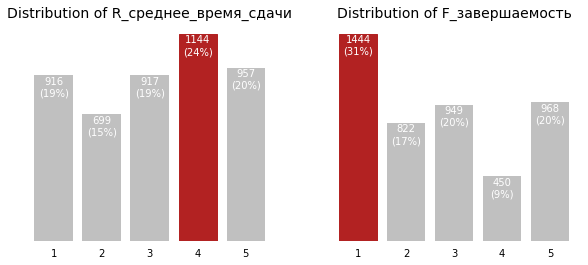

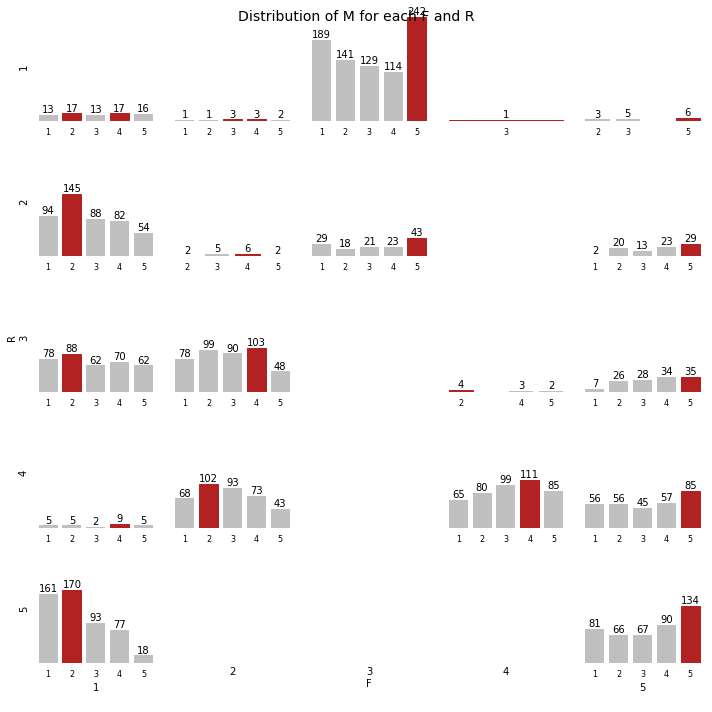

In [66]:
# plot the distribution of students over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'R_среднее_время_сдачи', 'F':'F_завершаемость'}
    y = rfm_table[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm_table[(rfm_table['R'] == r) & (rfm_table['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

С помощью графиков можно увидеть распределение по среднему времени сдачи (студенты выбирали не спешить, причем 24% сдавали экзамен не самыми последними) и распределение по завершаемости (31% студентов находятся в группе высокой завершаемости).
Если присмотреться к маленьким графичкам и вообразить оси абсцисс и ординат, то получится, что самый высокий средний балл у студентов, которые быстро сдавали и имели высокую завершаемость.
Но это не значит, что другие студенты были хуже и их за это нужно ругать!

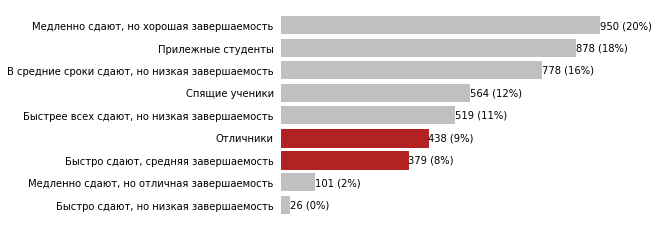

In [67]:
# count the number of students in each segment
segments_counts = rfm_table['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['В средние сроки сдают и средняя завершаемость', 'Быстро сдают, средняя завершаемость'\
                                        , 'Отличники']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Студенты, которые в среднем быстро сдавали экзамены и принадлежали к группе с высокой завершаемостью, не в большинстве, что является вариантом нормы.

# Спасибо за внимание! ❤